In [219]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sympy import *
from scipy.optimize import curve_fit
fi = open('xnodes.txt', 'r')
x_nodes = fi.read().split(',')
fi = open('ynodes.txt', 'r')
y_nodes = fi.read().split(',')
max_x = 0
max_y = 0
x_nodes = list(map(float, x_nodes))
x_nodes = np.array(x_nodes) 
y_nodes = list(map(float, y_nodes))
y_nodes = np.array(y_nodes) 

for j in range(np.size(x_nodes)-1):
    for i in range(np.size(x_nodes)-1):
        if(x_nodes[i]>x_nodes[i+1]):
            max_x = x_nodes[i]
            x_nodes[i] = x_nodes[i+1]
            x_nodes[i+1] = max_x
            max_y = y_nodes[i]
            y_nodes[i] = y_nodes[i+1]
            y_nodes[i+1] = max_y
def f_x(x_node, ap, bp, cp, dp, ep):
    sin = np.sin(ap*x_node-cp*np.pi)
    return (sin*(bp*x_node**2)*(dp**x_node)/ep)
n = 200
x_approx = np.linspace(x_nodes[0], x_nodes[39], n)
solution = curve_fit(f_x, x_nodes, y_nodes)[0] 
ap = solution[0]
bp = solution[1]
cp = solution[2]
dp = solution[3]
ep = solution[4]
print("Оптимизированные значения:")
print('a:',ap,'\nb:',bp,'\nc:',cp,'\nd:',dp, '\ne:',ep)

Оптимизированные значения:
a: 0.8103077694381909 
b: 0.1341667280230567 
c: 0.5033462929367665 
d: 0.9856749142183585 
e: 0.12711563693333255


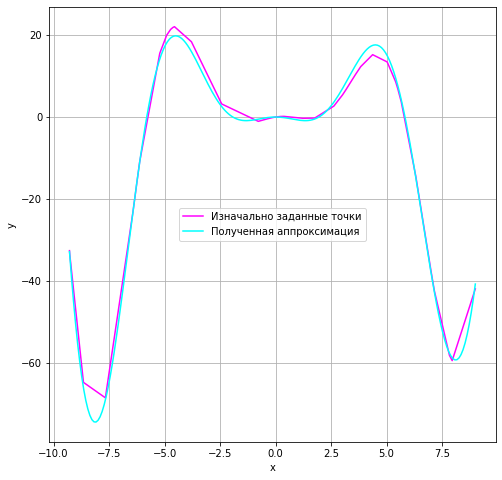

In [220]:
y_approx = f_x(x_approx,ap,bp,cp,dp,ep)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
axes.plot(x_nodes, y_nodes,'magenta', label = 'Изначально заданные точки')
axes.plot(x_approx, y_approx,'cyan', label = 'Полученная аппроксимация')
axes.set_xlabel("x") 
axes.set_ylabel("y")
axes.legend(loc = 'center')
axes.grid()
plt.show()

In [221]:
max_err_x = 0
max_err_y = 0
err = 0
dist = 0
for i in range(0,len(y_nodes)):
    dist = abs(y_nodes[i] - f_x(x_nodes[i],ap,bp,cp,dp,ep))
    if(dist>err):
        err = dist
        max_err_x = x_nodes[i]
        max_err_y = y_nodes[i]
s = 0
pr = 0
err = 0
for i in range(0,len(y_nodes)):
    pr = (y_nodes[i] - f_x(x_nodes[i], ap, bp,cp,dp,ep))**2
    s = s + pr
err = np.sqrt(s)/len(y_nodes)
print('Максимальное отклонение:',err,'в точке [',format(round(max_err_x, 6)),';',format(round(max_err_y, 6)),']')
print('Среднеквадратичная ошибка аппроксимации:', format(round(err, 6)))

Максимальное отклонение: 0.1990308762781229 в точке [ -3.789769 ; 18.397763 ]
Среднеквадратичная ошибка аппроксимации: 0.199031
